# **Project Name**    - 



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual

# **Project Summary -**

This data science project aims to apply unsupervised learning techniques on a dataset of Netflix movies and TV shows to identify patterns and trends that can inform content recommendations. The dataset consists of over 10,000 titles with information on release year, genre, director, cast, and rating.

The first step in this project involves data cleaning to remove any errors, inconsistencies, and missing values. Once the data is cleaned, it will be visualized to gain insights into the distribution and characteristics of the dataset. Visualization techniques such as scatter plots, histograms, and heatmaps will be used to explore the relationships between different features.

After the data is cleaned and visualized, preprocessing techniques such as feature scaling and normalization will be applied to prepare the dataset for machine learning algorithms. The dataset will be split into training and testing sets, and the unsupervised learning algorithms will be applied on the training set.

Clustering algorithms such as k-means and hierarchical clustering will be used to group similar titles based on their features. The optimal number of clusters will be determined using metrics such as the elbow method and silhouette score. Dimensionality reduction techniques such as principal component analysis (PCA) and t-SNE will also be applied to visualize the relationships between different features and identify any underlying structures in the data.

Finally, the results of the clustering and dimensionality reduction will be evaluated using metrics such as within-cluster sum of squares (WSS) and silhouette score. The most meaningful and informative clusters will be selected for further analysis and interpretation. The insights gained from this analysis can inform decisions around content creation and acquisition, as well as improve the user experience for viewers.

Overall, this project aims to use unsupervised learning techniques to identify hidden patterns and trends in a complex dataset of Netflix movies and TV shows, which can inform business decisions and enhance the viewing experience for audiences.

# **GitHub Link -**

https://github.com/parshvak26

# **Problem Statement**


The streaming service industry has become increasingly competitive, with Netflix being one of the leading providers of online streaming content. However, with such a large collection of titles, it can be challenging to provide personalized content recommendations that cater to individual user preferences. To address this challenge, this data science project aims to apply unsupervised learning techniques on a dataset of Netflix movies and TV shows to identify patterns and trends that can inform content recommendations.

The dataset consists of over7787 titles with information on release year, genre, director, cast, and rating. The objective of this project is to apply unsupervised learning algorithms such as clustering and dimensionality reduction to group similar titles and identify hidden patterns and relationships between different features. By doing so, this project aims to uncover valuable insights that can inform business decisions around content creation and acquisition, as well as improve the user experience for viewers.

The problem statement for this project is how to leverage unsupervised learning techniques to identify patterns and trends in a large and complex dataset of Netflix movies and TV shows that can inform content recommendations and improve the user experience. The project aims to address this problem by applying data preprocessing, visualization, and unsupervised learning algorithms to extract valuable insights from the dataset. The results of this analysis can be used to provide more personalized content recommendations, increase user engagement, and enhance customer satisfaction.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Importing Essential Libraries
import pandas as pd
import numpy as np
from pandas import datetime as dt
from pandas import Series,DataFrame
import datetime

# Importing Libraries For Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm
from scipy import stats
import missingno as msno
import matplotlib.cm as cm

# Importing Libraries For NPL
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import scipy.cluster.hierarchy as sch

# Ignoring warnings
import warnings
warnings.filterwarnings('ignore')

<ipython-input-1-ccd6ced2c4e2>:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime as dt


### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/AlmaBetter projects/NETFLIX MOVIES AND TV SHOWS Unsupervised/NETFLIX MOVIES AND TV SHOWS CLUSTERING (1).csv')

In [ ]:
# Load Dataset

### Dataset First View

In [ ]:
# Dataset First Look
dataset.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
dataset.shape

(7787, 12)

### Dataset Information

In [ ]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(dataset[dataset.duplicated()])

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
dataset.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

<Axes: >

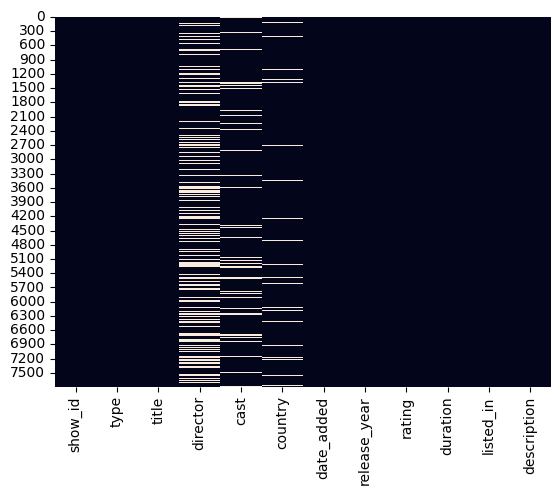

In [ ]:
# Visualizing the missing values
sns.heatmap(dataset.isnull(), cbar=False)

### What did you know about your dataset?

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
dataset.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Dataset Describe
dataset.describe(include='all')

show_id   type title                director                cast  \
count     7787   7787  7787                    5398                7069   
unique    7787      2  7787                    4049                6831   
top         s1  Movie    3%  Raúl Campos, Jan Suter  David Attenborough   
freq         1   5377     1                      18                  18   
mean       NaN    NaN   NaN                     NaN                 NaN   
std        NaN    NaN   NaN                     NaN                 NaN   
min        NaN    NaN   NaN                     NaN                 NaN   
25%        NaN    NaN   NaN                     NaN                 NaN   
50%        NaN    NaN   NaN                     NaN                 NaN   
75%        NaN    NaN   NaN                     NaN                 NaN   
max        NaN    NaN   NaN                     NaN                 NaN   

              country       date_added  release_year rating  duration  \
count            7280             7777   7787.000000   7780      7787   
unique            681             1565           NaN     14       216   
top     United States  January 1, 2020           NaN  TV-MA  1 Season   
freq             2555              118           NaN   2863      1608   
mean              NaN              NaN   2013.932580    NaN       NaN   
std               NaN              NaN      8.757395    NaN       NaN   
min               NaN              NaN   1925.000000    NaN       NaN   
25%               NaN              NaN   2013.000000    NaN       NaN   
50%               NaN              NaN   2017.000000    NaN       NaN   
75%               NaN              NaN   2018.000000    NaN       NaN   
max               NaN              NaN   2021.000000    NaN       NaN   

            listed_in                                        description  
count            7787                                               7787  
unique            492                                               7769  
top     Documentaries  Multiple women report their husbands as missin...  
freq              334                                                  3  
mean              NaN                                                NaN  
std               NaN                                                NaN  
min               NaN                                                NaN  
25%               NaN                                                NaN  
50%               NaN                                                NaN  
75%               NaN                                                NaN  
max               NaN                                                NaN

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in dataset.columns:
  print(f'Unique values in Columns {i} is {dataset[i].nunique()}')

Unique values in Columns show_id is 7787
Unique values in Columns type is 2
Unique values in Columns title is 7787
Unique values in Columns director is 4049
Unique values in Columns cast is 6831
Unique values in Columns country is 681
Unique values in Columns date_added is 1565
Unique values in Columns release_year is 73
Unique values in Columns rating is 14
Unique values in Columns duration is 216
Unique values in Columns listed_in is 492
Unique values in Columns description is 7769


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df = dataset.copy()

In [ ]:
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [ ]:
for i in df.columns:
  print(i, df[i].isnull().sum() / df.shape[0]*100)

show_id 0.0
type 0.0
title 0.0
director 30.679337357133683
cast 9.220495697958135
country 6.51085141903172
date_added 0.1284191601386927
release_year 0.0
rating 0.08989341209708489
duration 0.0
listed_in 0.0
description 0.0


In [ ]:
#dropping row with missing value
df.dropna(subset = ['date_added','rating'], inplace = True)

In [ ]:
#filling country column of missing row with mode
df['country'] = df['country'].fillna(df['country'].mode()[0])

In [ ]:
for i in df.columns:
  print(i, df[i].isnull().sum() / df.shape[0]*100)

show_id 0.0
type 0.0
title 0.0
director 30.57915057915058
cast 9.24066924066924
country 0.0
date_added 0.0
release_year 0.0
rating 0.0
duration 0.0
listed_in 0.0
description 0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7770 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7770 non-null   object
 1   type          7770 non-null   object
 2   title         7770 non-null   object
 3   director      5394 non-null   object
 4   cast          7052 non-null   object
 5   country       7770 non-null   object
 6   date_added    7770 non-null   object
 7   release_year  7770 non-null   int64 
 8   rating        7770 non-null   object
 9   duration      7770 non-null   object
 10  listed_in     7770 non-null   object
 11  description   7770 non-null   object
dtypes: int64(1), object(11)
memory usage: 789.1+ KB


In [ ]:
#converting date_added to datetime
df['date_added'] = pd.to_datetime(df['date_added'])
print(df.date_added.dtype)

datetime64[ns]


In [ ]:
# Adding year month date column
df['year'] = pd.DatetimeIndex(df['date_added']).year
df['month'] = pd.DatetimeIndex(df['date_added']).month
df['date'] = pd.DatetimeIndex(df['date_added']).day

In [ ]:
# Dropping date column
df = df.drop('date_added', axis=1)

In [ ]:
# adding new column with all value 0 so we can add value futher
df['seasons'] = 0

In [ ]:
# Adding number of season to season column if duration column has seasons 
for index, row in df.iterrows():
  if row.duration.endswith('Seasons') or row.duration.endswith('Season'):
    df.loc[index, 'seasons'] = df.loc[index, 'duration']

In [ ]:
# CHanging value from duration column of all seasons
for index, row in df.iterrows():
  if row.duration.endswith('Seasons') or row.duration.endswith('Season'):
    df.loc[index, 'duration'] = np.nan

In [ ]:
#dropping release year column
df.drop('release_year', axis=1, inplace=True)

In [ ]:
#Converting listed in column to list
df['listed_in'] = df['listed_in'].str.split(',')

In [ ]:
df.listed_in[135]

['Comedies', ' International Movies', ' Music & Musicals']

Till now we have completed basic data cleaning. So lets go ahead and explore

In [ ]:
#Couting type of movies or tv shows
df_type = pd.DataFrame(df.groupby('type')['type'].count().reset_index(name="count"))

In [ ]:
df_rating = pd.DataFrame(df.groupby('rating')['rating'].count().reset_index(name = 'Count'))

In [ ]:
df_country = pd.DataFrame(df.groupby('country')['country'].count().reset_index(name='count')).sort_values(by='count', ascending =False).reset_index(drop=True)

In [ ]:
df_tv = df[df['type'] == 'TV Show']
df_movie = df[df['type'] == 'Movie']

In [ ]:
df_tv["seasons"] = df_tv['seasons'].str.replace('Seasons', '')
df_tv["seasons"] = df_tv['seasons'].str.replace('Season', '')


In [ ]:
df_tv["seasons"] = df_tv["seasons"].astype(int)

In [ ]:
df_tv_highest_season = pd.DataFrame(df_tv.groupby('title')['seasons'].max().reset_index(name='max_seasons')).sort_values(by='max_seasons', ascending=False).reset_index(drop=True)

In [ ]:
df_movie['duration'] = df_movie['duration'].str.replace('min', '').astype(int)

In [ ]:
df_movie_highest_min = pd.DataFrame(df_movie.groupby('title')['duration'].max().reset_index(name='max_duration')).sort_values(by='max_duration', ascending=False).reset_index(drop=True)

In [ ]:
# Create a list of all the actors in the data.
def data2list(data):
  actor_list = {}  # dict to store the count for each actor.
  temp_list = []   # list to store all the names.
  cast_list = list(data['cast'])  # define the data we intend to use.
  for i in range(len(cast_list)):
    temp_list.extend(str(cast_list[i]).split(','))
  for i in temp_list:
    if i not in actor_list:
      actor_list[i] = temp_list.count(i)
  return actor_list
# Create dataframe for list of actors.
actor_list = pd.DataFrame([data2list(df)]).T.reset_index()
actor_list = actor_list.sort_values(0, ascending=False).drop(106)

In [ ]:
from collections import Counter

In [ ]:
tv_genre = []
for i in df_tv['listed_in']:
  if i not in tv_genre:
    tv_genre+= i


tv_genre = [i.strip() for i in tv_genre]
tv_genre_list = Counter(tv_genre)

tv_genre = pd.DataFrame(tv_genre_list.items())

tv_genre.columns = ['genre', 'count']

tv_genre.sort_values(by='count', ascending =False, inplace=True)
tv_genre.reset_index(drop=True,inplace=True)


In [ ]:
movie_genre = []
for i in df_movie['listed_in']:
  if i not in movie_genre:
    movie_genre+= i


movie_genre = [i.strip() for i in movie_genre]
movie_genre_list = Counter(movie_genre)

movie_genre = pd.DataFrame(movie_genre_list.items())

movie_genre.columns = ['genre', 'count']

movie_genre.sort_values(by='count', ascending =False, inplace=True)
movie_genre.reset_index(drop=True,inplace=True)


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

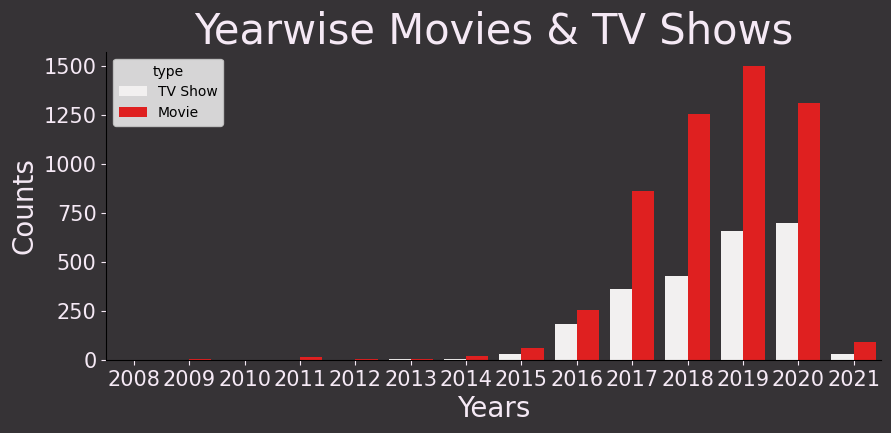

In [ ]:
# Chart - 1 visualization code
fig, ax = plt.subplots(figsize=(10,4),facecolor="#363336")
ax.patch.set_facecolor('#363336')
sns.countplot(x='year', hue='type',lw=5, color='red', data=df, ax=ax)
ax.tick_params(axis='x', colors='#F5E9F5',labelsize=15) 
ax.tick_params(axis='y', colors='#F5E9F5',labelsize=15)
ax.set_xlabel("Years", color='#F5E9F5', fontsize=20)
ax.set_ylabel("Counts",  color='#F5E9F5', fontsize=20)
ax.set_title("Yearwise Movies & TV Shows", color='#F5E9F5', fontsize=30)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

#### Chart - 2

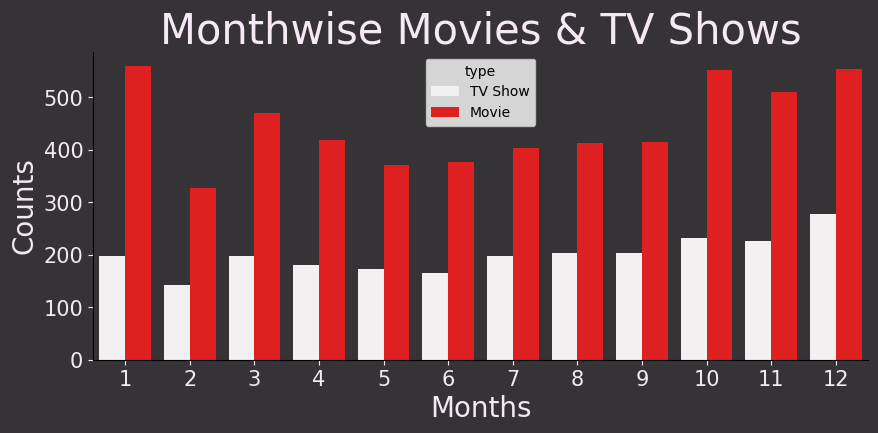

In [ ]:
# Chart - 2 visualization code
fig, ax = plt.subplots(figsize=(10,4),facecolor="#363336")
ax.patch.set_facecolor('#363336')
sns.countplot(x='month', hue='type',lw=5, color='red', data=df, ax=ax)
ax.tick_params(axis='x', colors='#F5E9F5',labelsize=15) 
ax.tick_params(axis='y', colors='#F5E9F5',labelsize=15)
ax.set_xlabel("Months", color='#F5E9F5', fontsize=20)
ax.set_ylabel("Counts",  color='#F5E9F5', fontsize=20)
ax.set_title("Monthwise Movies & TV Shows", color='#F5E9F5', fontsize=30)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)

#### Chart - 3

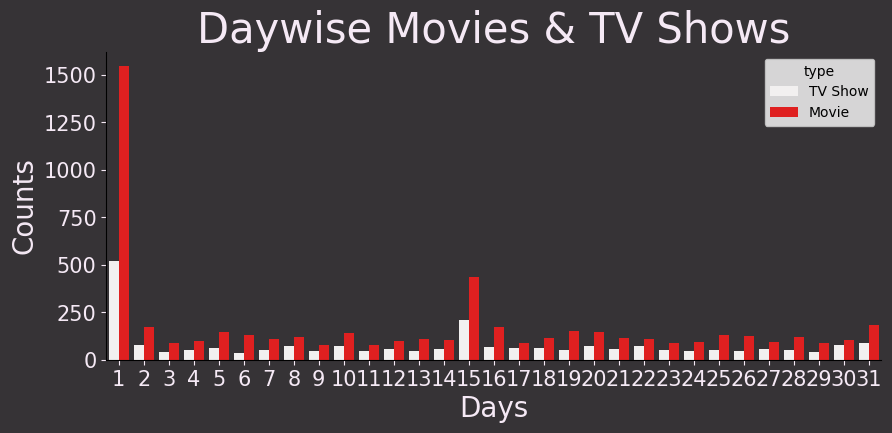

In [ ]:
# Chart - 3 visualization code
fig, ax = plt.subplots(figsize=(10,4),facecolor="#363336")
ax.patch.set_facecolor('#363336')
sns.countplot(x='date', hue='type',lw=5, color='red', data=df, ax=ax)
ax.tick_params(axis='x', colors='#F5E9F5',labelsize=15) 
ax.tick_params(axis='y', colors='#F5E9F5',labelsize=15)
ax.set_xlabel("Days", color='#F5E9F5', fontsize=20)
ax.set_ylabel("Counts",  color='#F5E9F5', fontsize=20)
ax.set_title("Daywise Movies & TV Shows", color='#F5E9F5', fontsize=30)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)

#### Chart - 5

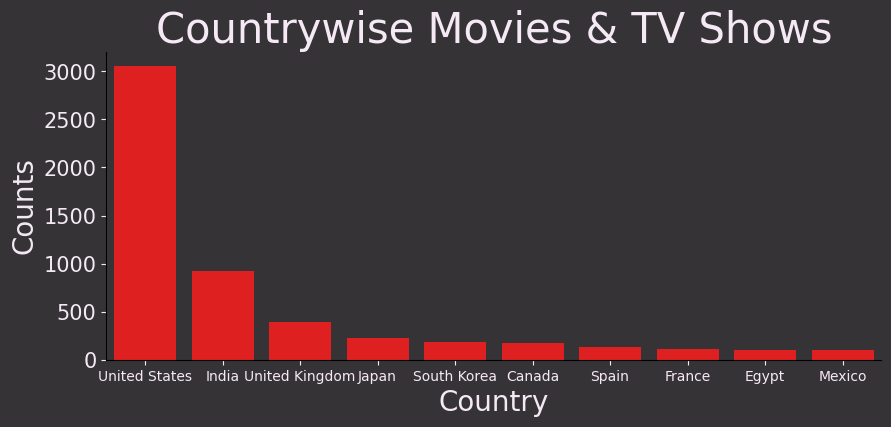

In [ ]:
# Chart - 5 visualization code
fig, ax = plt.subplots(figsize=(10,4),facecolor="#363336")
ax.patch.set_facecolor('#363336')
sns.barplot(x='country', y='count',lw=5, color='red', data=df_country[:10], ax=ax)
ax.tick_params(axis='x', colors='#F5E9F5',labelsize=10) 
ax.tick_params(axis='y', colors='#F5E9F5',labelsize=15)
ax.set_xlabel("Country", color='#F5E9F5', fontsize=20)
ax.set_ylabel("Counts",  color='#F5E9F5', fontsize=20)
ax.set_title("Countrywise Movies & TV Shows", color='#F5E9F5', fontsize=30)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)

#### Chart - 6

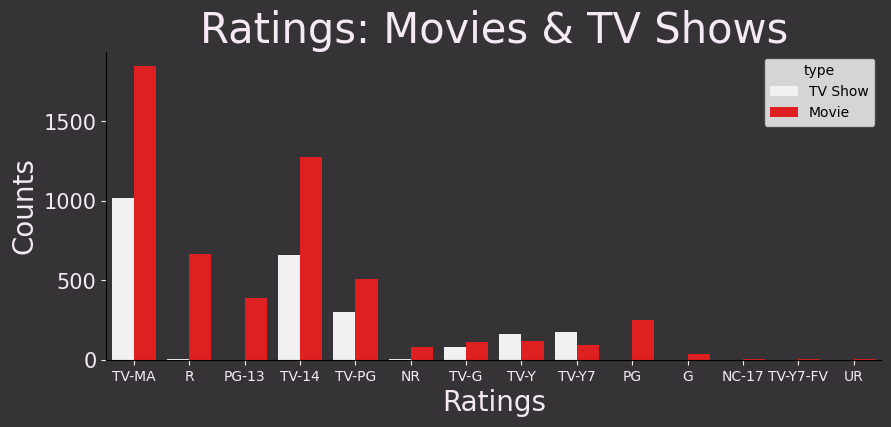

In [ ]:
# Chart - 6 visualization code
fig, ax = plt.subplots(figsize=(10,4),facecolor="#363336")
ax.patch.set_facecolor('#363336')
sns.countplot(x='rating', hue='type',lw=5, color='red', data=df, ax=ax)
ax.tick_params(axis='x', colors='#F5E9F5',labelsize=10) 
ax.tick_params(axis='y', colors='#F5E9F5',labelsize=15)
ax.set_xlabel("Ratings", color='#F5E9F5', fontsize=20)
ax.set_ylabel("Counts",  color='#F5E9F5', fontsize=20)
ax.set_title("Ratings: Movies & TV Shows", color='#F5E9F5', fontsize=30)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)

#### Chart - 7

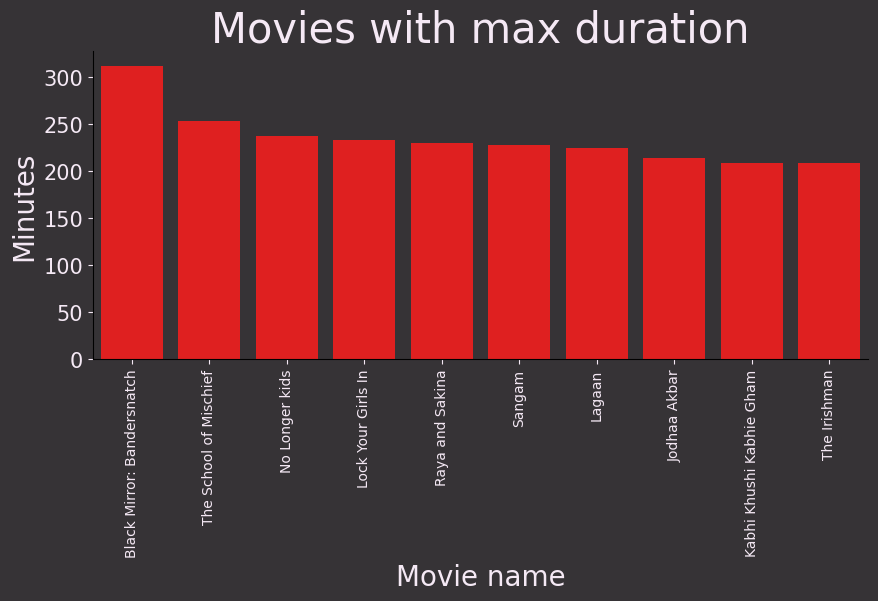

In [ ]:
# Chart - 7 visualization code
fig, ax = plt.subplots(figsize=(10,4),facecolor="#363336")
ax.patch.set_facecolor('#363336')
sns.barplot(x='title', y='max_duration',lw=5, color='red', data=df_movie_highest_min[:10], ax=ax)
ax.tick_params(axis='x', colors='#F5E9F5',labelsize=10) 
plt.xticks(rotation=90)
ax.tick_params(axis='y', colors='#F5E9F5',labelsize=15)
ax.set_xlabel("Movie name", color='#F5E9F5', fontsize=20)
ax.set_ylabel("Minutes",  color='#F5E9F5', fontsize=20)
ax.set_title("Movies with max duration", color='#F5E9F5', fontsize=30)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)

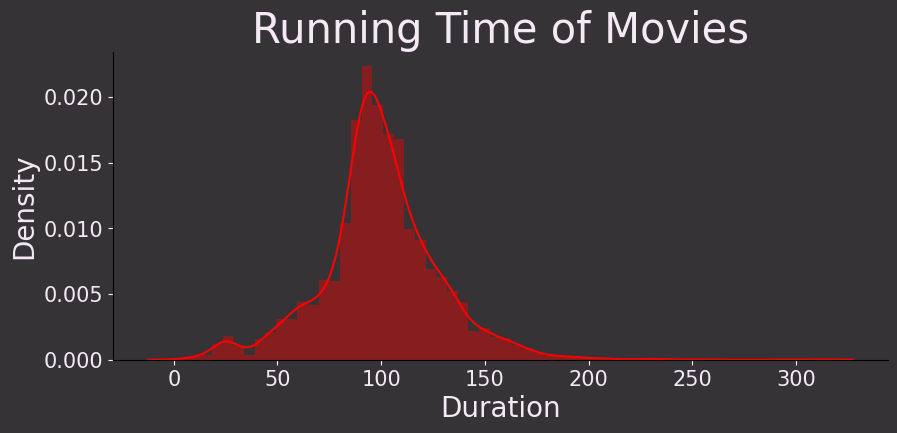

In [ ]:
fig, ax = plt.subplots(figsize=(10,4),facecolor="#363336")
ax.patch.set_facecolor('#363336')
sns.distplot(df_movie['duration'], hist=True, bins=60,color='red', ax=ax)
ax.tick_params(axis= 'x', colors='#F5E9F5',labelsize=15) 
ax.tick_params(axis='y', colors='#F5E9F5',labelsize=15)
ax.set_xlabel("Duration", color='#F5E9F5', fontsize=20)
ax.set_ylabel("Density", color='#F5E9F5', fontsize=20)
ax.set_title("Running Time of Movies", color='#F5E9F5', fontsize=30)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)

#### Chart - 8

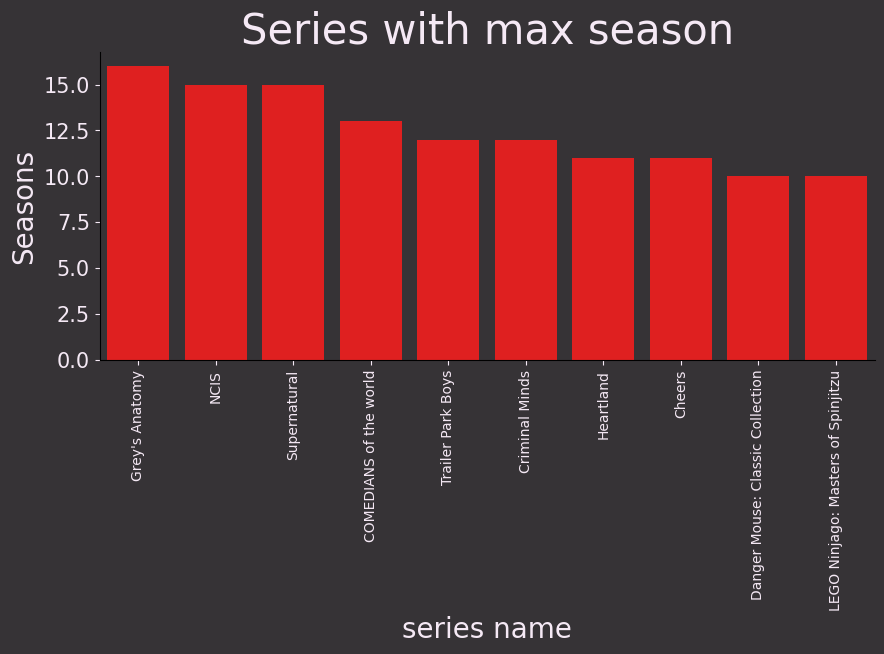

In [ ]:
# Chart - 8 visualization code
fig, ax = plt.subplots(figsize=(10,4),facecolor="#363336")
ax.patch.set_facecolor('#363336')
sns.barplot(x='title', y='max_seasons',lw=5, color='red', data=df_tv_highest_season[:10], ax=ax)
ax.tick_params(axis='x', colors='#F5E9F5',labelsize=10) 
plt.xticks(rotation=90)
ax.tick_params(axis='y', colors='#F5E9F5',labelsize=15)
ax.set_xlabel("series name", color='#F5E9F5', fontsize=20)
ax.set_ylabel("Seasons",  color='#F5E9F5', fontsize=20)
ax.set_title("Series with max season", color='#F5E9F5', fontsize=30)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)

#### Chart - 9

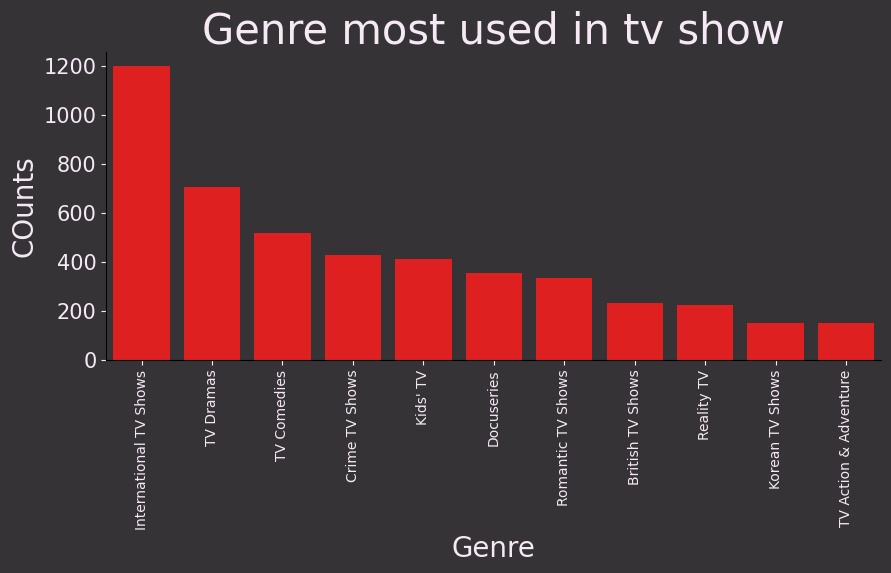

In [ ]:
# Chart - 9 visualization code
fig, ax = plt.subplots(figsize=(10,4),facecolor="#363336")
ax.patch.set_facecolor('#363336')
sns.barplot(x='genre', y='count',lw=5, color='red', data=tv_genre[:11], ax=ax)
ax.tick_params(axis='x', colors='#F5E9F5',labelsize=10) 
plt.xticks(rotation=90)
ax.tick_params(axis='y', colors='#F5E9F5',labelsize=15)
ax.set_xlabel("Genre", color='#F5E9F5', fontsize=20)
ax.set_ylabel("COunts",  color='#F5E9F5', fontsize=20)
ax.set_title("Genre most used in tv show", color='#F5E9F5', fontsize=30)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)

#### Chart - 10

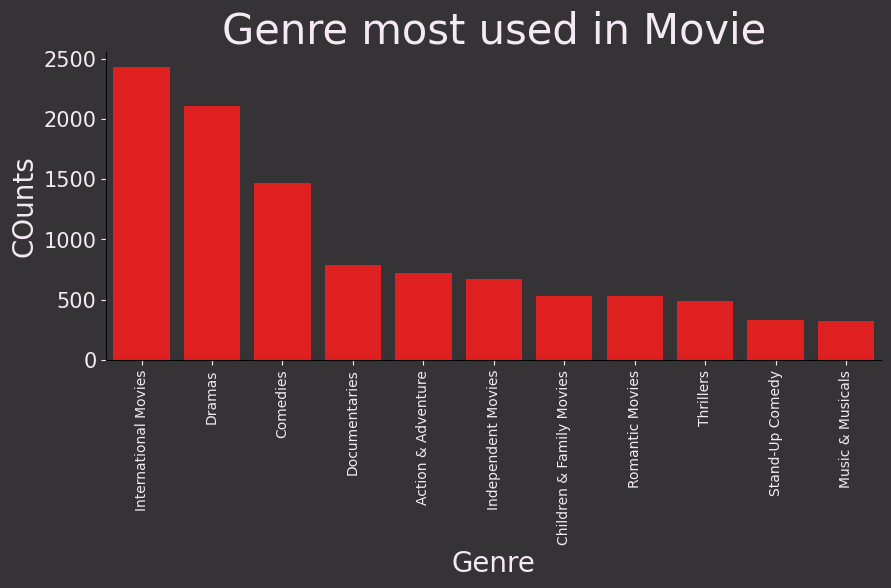

In [ ]:
# Chart - 10 visualization code
fig, ax = plt.subplots(figsize=(10,4),facecolor="#363336")
ax.patch.set_facecolor('#363336')
sns.barplot(x='genre', y='count',lw=5, color='red', data=movie_genre[:11], ax=ax)
ax.tick_params(axis='x', colors='#F5E9F5',labelsize=10) 
plt.xticks(rotation=90)
ax.tick_params(axis='y', colors='#F5E9F5',labelsize=15)
ax.set_xlabel("Genre", color='#F5E9F5', fontsize=20)
ax.set_ylabel("COunts",  color='#F5E9F5', fontsize=20)
ax.set_title("Genre most used in Movie", color='#F5E9F5', fontsize=30)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)

#### Chart - 11

([<matplotlib.patches.Wedge at 0x7fec091abc70>,
 [Text(-0.9071052118424069, -0.6222219335963192, 'Movie'),
  Text(0.9895693220098982, 0.6787875639232577, 'TV Show')],
 [Text(-0.49478466100494917, -0.33939378196162856, '69.14%'),
  Text(0.5772487711724406, 0.3959594122885669, '30.86%')])

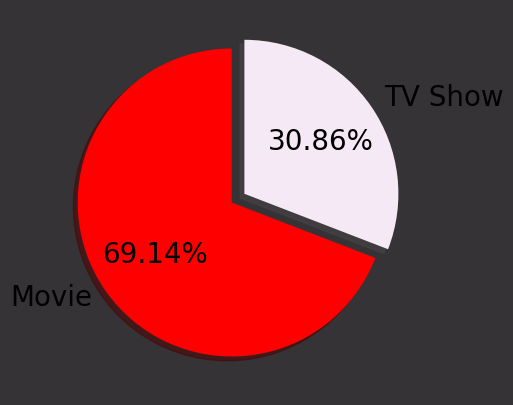

In [ ]:
# Chart - 11 visualization code
# Pie chart showing percentage of toal movies and TV shows.
fig, ax = plt.subplots(figsize=(5,5),facecolor="#363336")
ax.patch.set_facecolor('#363336')
explode = (0, 0.1)
ax.pie(df['type'].value_counts(), explode=explode, autopct='%.2f%%', labels= ['Movie', 'TV Show'],shadow=True,
       startangle=90,textprops={'color':"black", 'fontsize': 20}, colors =['red','#F5E9F5'])

####Chart- 12

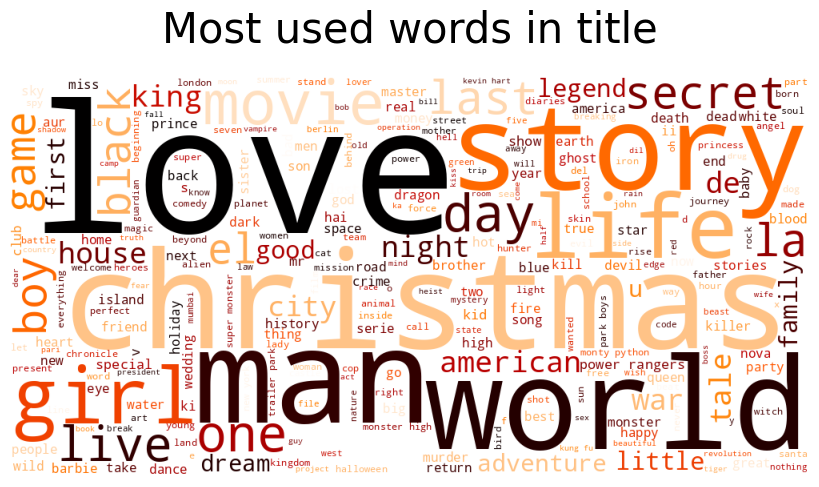

In [ ]:
# Import the required libraries.
from wordcloud import WordCloud, STOPWORDS 

# Create a string to store all the words.
comment_words = ''

# Remove the stopwords.
stopwords = set(STOPWORDS)
 
# iterate through the column.
for val in df.title:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 1000, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10,
                max_words = 1000,
                colormap = 'gist_heat_r').generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.title('Most used words in title', fontsize = 30, pad=25)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

####Chart -13

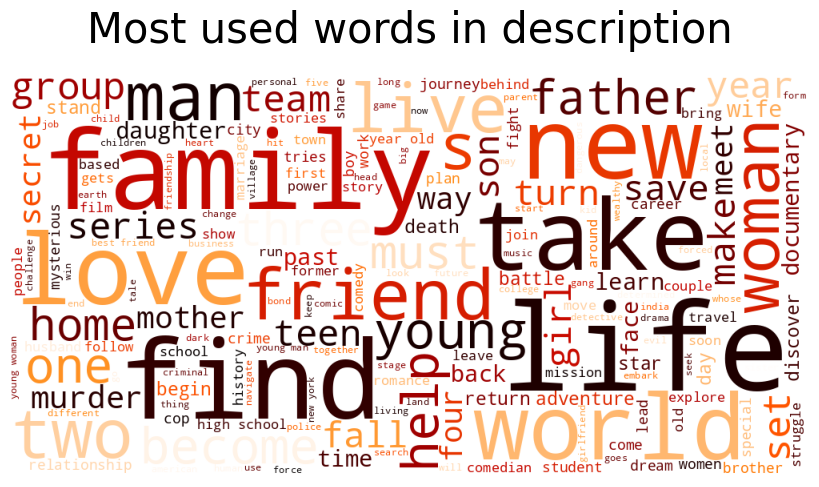

In [ ]:
# Create a string to store all the words.
comment_words = ''

# Remove the stopwords.
stopwords = set(STOPWORDS)
 
# iterate through the column.
for val in df.description:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 1000, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10,
                max_words = 1000,
                colormap = 'gist_heat').generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.title('Most used words in description', fontsize = 30, pad=25)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()


####Chart - 14

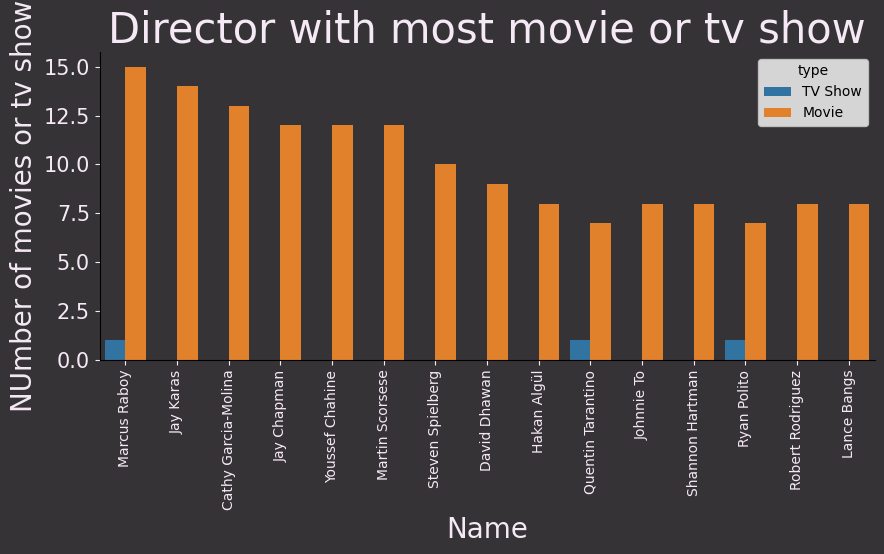

In [ ]:
fig, ax = plt.subplots(figsize=(10,4),facecolor="#363336")
ax.patch.set_facecolor('#363336')
list_order1 = df.director.value_counts().index[1:16]
plot_director = sns.countplot(data = df, x = 'director', hue = 'type',
                                  order = list_order1)
plot_director.set_xticklabels(plot_director.get_xticklabels(), rotation=90)
ax.tick_params(axis='x', colors='#F5E9F5',labelsize=10) 
plt.xticks(rotation=90)
ax.tick_params(axis='y', colors='#F5E9F5',labelsize=15)
ax.set_xlabel("Name", color='#F5E9F5', fontsize=20)
ax.set_ylabel("NUmber of movies or tv show",  color='#F5E9F5', fontsize=20)
ax.set_title("Director with most movie or tv show", color='#F5E9F5', fontsize=30)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
plt.show()

####Chart- 15

In [ ]:
actor_list.columns = ['actor', 'count']

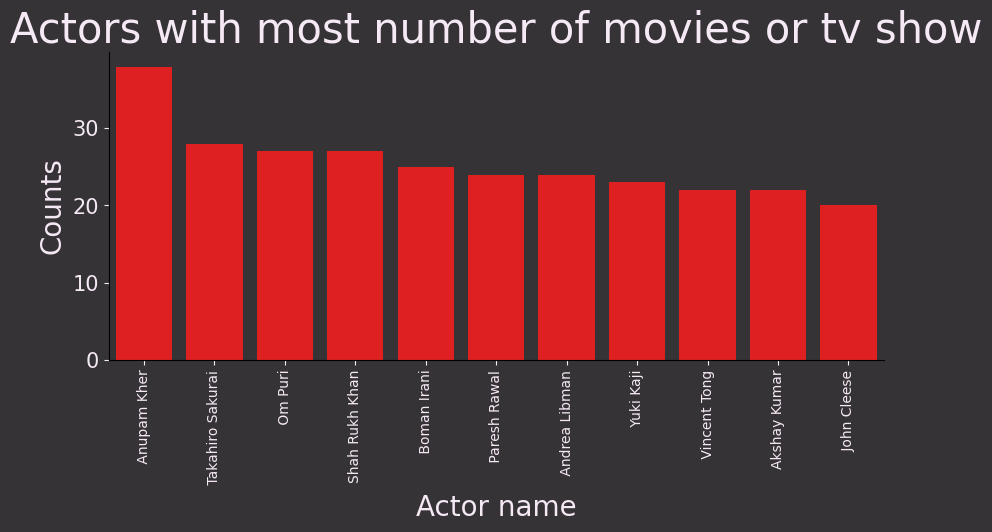

In [ ]:
# Chart - 5 visualization code
fig, ax = plt.subplots(figsize=(10,4),facecolor="#363336")
ax.patch.set_facecolor('#363336')
sns.barplot(x='actor', y='count',lw=5, color='red', data=actor_list[:11], ax=ax)
ax.tick_params(axis='x', colors='#F5E9F5',labelsize=10) 
ax.tick_params(axis='y', colors='#F5E9F5',labelsize=15)
ax.set_xlabel("Actor name", color='#F5E9F5', fontsize=20)
ax.set_ylabel("Counts",  color='#F5E9F5', fontsize=20)
plt.xticks(rotation = 90)
ax.set_title("Actors with most number of movies or tv show", color='#F5E9F5', fontsize=30)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
for i in df.columns:
  print(f"{i:15} {df[i].isnull().sum():10} {df[i].isnull().sum() / df.shape[0] *100:10.2f}%")
print(df.shape)


show_id                  0       0.00%
type                     0       0.00%
title                    0       0.00%
director              2376      30.58%
cast                   718       9.24%
country                  0       0.00%
rating                   0       0.00%
duration              2398      30.86%
listed_in                0       0.00%
description              0       0.00%
year                     0       0.00%
month                    0       0.00%
date                     0       0.00%
seasons                  0       0.00%
(7770, 14)


In [ ]:
# here we will be dropping director column because it has 30% missing value and season column because it also has lots of missing value but these are in 0's
df.drop(['director','seasons'], axis=1, inplace=True)
df['duration'] = dataset['duration']

In [ ]:
# Handling Missing Values & Missing Value Imputation
df = df[df['cast'].notna()]

In [ ]:
for i in df.columns:
  print(f"{i:15} {df[i].isnull().sum():10} {df[i].isnull().sum() / df.shape[0] *100:10.2f}%")
print(df.shape)


show_id                  0       0.00%
type                     0       0.00%
title                    0       0.00%
cast                     0       0.00%
country                  0       0.00%
rating                   0       0.00%
duration                 0       0.00%
listed_in                0       0.00%
description              0       0.00%
year                     0       0.00%
month                    0       0.00%
date                     0       0.00%
(7052, 12)


### 2. Handling Outliers

In [ ]:
df.head()

show_id     type  title                                               cast  \
0      s1  TV Show     3%  João Miguel, Bianca Comparato, Michel Gomes, R...   
1      s2    Movie   7:19  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2      s3    Movie  23:59  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3      s4    Movie      9  Elijah Wood, John C. Reilly, Jennifer Connelly...   
4      s5    Movie     21  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   

         country rating   duration  \
0         Brazil  TV-MA  4 Seasons   
1         Mexico  TV-MA     93 min   
2      Singapore      R     78 min   
3  United States  PG-13     80 min   
4  United States  PG-13    123 min   

                                           listed_in  \
0  [International TV Shows,  TV Dramas,  TV Sci-F...   
1                    [Dramas,  International Movies]   
2             [Horror Movies,  International Movies]   
3  [Action & Adventure,  Independent Movies,  Sci...   
4                                           [Dramas]   

                                         description  year  month  date  
0  In a future where the elite inhabit an island ...  2020      8    14  
1  After a devastating earthquake hits Mexico Cit...  2016     12    23  
2  When an army recruit is found dead, his fellow...  2018     12    20  
3  In a postapocalyptic world, rag-doll robots hi...  2017     11    16  
4  A brilliant group of students become card-coun...  2020      1     1

####** As we can see here this dataset contain no numeric value so we dont have to deal with outlier.**

### 3. Categorical Encoding

In [ ]:
df.head()

show_id     type  title                                               cast  \
0      s1  TV Show     3%  João Miguel, Bianca Comparato, Michel Gomes, R...   
1      s2    Movie   7:19  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2      s3    Movie  23:59  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3      s4    Movie      9  Elijah Wood, John C. Reilly, Jennifer Connelly...   
4      s5    Movie     21  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   

         country rating   duration  \
0         Brazil  TV-MA  4 Seasons   
1         Mexico  TV-MA     93 min   
2      Singapore      R     78 min   
3  United States  PG-13     80 min   
4  United States  PG-13    123 min   

                                           listed_in  \
0  [International TV Shows,  TV Dramas,  TV Sci-F...   
1                    [Dramas,  International Movies]   
2             [Horror Movies,  International Movies]   
3  [Action & Adventure,  Independent Movies,  Sci...   
4                                           [Dramas]   

                                         description  year  month  date  
0  In a future where the elite inhabit an island ...  2020      8    14  
1  After a devastating earthquake hits Mexico Cit...  2016     12    23  
2  When an army recruit is found dead, his fellow...  2018     12    20  
3  In a postapocalyptic world, rag-doll robots hi...  2017     11    16  
4  A brilliant group of students become card-coun...  2020      1     1

In [ ]:
# Encode your categorical columns
# Apply one-hot encoding on 'Size' column
one_hot_encoded = pd.get_dummies(df[['type','rating']])

# Concatenate the one-hot encoded DataFrame with the original DataFrame
df = pd.concat([df, one_hot_encoded], axis=1)

# Show the encoded DataFrame
df.head()

show_id     type  title                                               cast  \
0      s1  TV Show     3%  João Miguel, Bianca Comparato, Michel Gomes, R...   
1      s2    Movie   7:19  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2      s3    Movie  23:59  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3      s4    Movie      9  Elijah Wood, John C. Reilly, Jennifer Connelly...   
4      s5    Movie     21  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   

         country rating   duration  \
0         Brazil  TV-MA  4 Seasons   
1         Mexico  TV-MA     93 min   
2      Singapore      R     78 min   
3  United States  PG-13     80 min   
4  United States  PG-13    123 min   

                                           listed_in  \
0  [International TV Shows,  TV Dramas,  TV Sci-F...   
1                    [Dramas,  International Movies]   
2             [Horror Movies,  International Movies]   
3  [Action & Adventure,  Independent Movies,  Sci...   
4                                           [Dramas]   

                                         description  year  month  date  \
0  In a future where the elite inhabit an island ...  2020      8    14   
1  After a devastating earthquake hits Mexico Cit...  2016     12    23   
2  When an army recruit is found dead, his fellow...  2018     12    20   
3  In a postapocalyptic world, rag-doll robots hi...  2017     11    16   
4  A brilliant group of students become card-coun...  2020      1     1   

   type_Movie  type_TV Show  rating_G  rating_NC-17  rating_NR  rating_PG  \
0           0             1         0             0          0          0   
1           1             0         0             0          0          0   
2           1             0         0             0          0          0   
3           1             0         0             0          0          0   
4           1             0         0             0          0          0   

   rating_PG-13  rating_R  rating_TV-14  rating_TV-G  rating_TV-MA  \
0             0         0             0            0             1   
1             0         0             0            0             1   
2             0         1             0            0             0   
3             1         0             0            0             0   
4             1         0             0            0             0   

   rating_TV-PG  rating_TV-Y  rating_TV-Y7  rating_TV-Y7-FV  rating_UR  
0             0            0             0                0          0  
1             0            0             0                0          0  
2             0            0             0                0          0  
3             0            0             0                0          0  
4             0            0             0                0          0

In [ ]:
df.drop(['type','rating'], axis = 1, inplace=True)

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 2. Lower Casing

In [ ]:
df['listed_in'] = df['listed_in'].str.join(' ')

In [ ]:
cluster_df = df[['title']]
cluster_df['cluster_data'] = (df['description'] + ' ' + df['listed_in'] + ' ' + df['cast'] + ' ' + df['country'] ).astype(str)
cluster_df.set_index('title', inplace = True)
cluster_df.head()

cluster_data
title                                                   
3%     In a future where the elite inhabit an island ...
7:19   After a devastating earthquake hits Mexico Cit...
23:59  When an army recruit is found dead, his fellow...
9      In a postapocalyptic world, rag-doll robots hi...
21     A brilliant group of students become card-coun...

In [ ]:
# Lower Casing
cluster_df['cluster_data'] = cluster_df['cluster_data'].str.lower()


In [ ]:
cluster_df.head()

cluster_data
title                                                   
3%     in a future where the elite inhabit an island ...
7:19   after a devastating earthquake hits mexico cit...
23:59  when an army recruit is found dead, his fellow...
9      in a postapocalyptic world, rag-doll robots hi...
21     a brilliant group of students become card-coun...

#### 3. Removing Punctuations

In [ ]:
cluster_df.head()

cluster_data
title                                                   
3%     in a future where the elite inhabit an island ...
7:19   after a devastating earthquake hits mexico cit...
23:59  when an army recruit is found dead, his fellow...
9      in a postapocalyptic world, rag-doll robots hi...
21     a brilliant group of students become card-coun...

In [ ]:
# Remove Punctuations
import string

cluster_df['cluster_data'] = cluster_df['cluster_data'].str.replace('[^\w\s]', '')


In [ ]:
cluster_df.head()

cluster_data
title                                                   
3%     in a future where the elite inhabit an island ...
7:19   after a devastating earthquake hits mexico cit...
23:59  when an army recruit is found dead his fellow ...
9      in a postapocalyptic world ragdoll robots hide...
21     a brilliant group of students become cardcount...

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
#import nltk library for stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# extracting the stopwords from nltk library
sw = nltk.corpus.stopwords.words('english')
#print number of stopwords
print("Number of stopwords in english : ", len(sw))
print('-'*50)
# displaying the stopwords
print('STOP WORDS: ',*sw)

Number of stopwords in english :  179
--------------------------------------------------
STOP WORDS:  i me my myself we our ours ourselves you you're you've you'll you'd your yours yourself yourselves he him his himself she she's her hers herself it it's its itself they them their theirs themselves what which who whom this that that'll these those am is are was were be been being have has had having do does did doing a an the and but if or because as until while of at by for with about against between into through during before after above below to from up down in out on off over under again further then once here there when where why how all any both each few more most other some such no nor not only own same so than too very s t can will just don don't should should've now d ll m o re ve y ain aren aren't couldn couldn't didn didn't doesn doesn't hadn hadn't hasn hasn't haven haven't isn isn't ma mightn mightn't mustn mustn't needn needn't shan shan't shouldn shouldn't wasn wasn't we

In [ ]:
#function for removing stopwords
def remove_stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    #Method 1
    text1 = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text1)

In [ ]:
cluster_df.head()

cluster_data
title                                                   
3%     in a future where the elite inhabit an island ...
7:19   after a devastating earthquake hits mexico cit...
23:59  when an army recruit is found dead his fellow ...
9      in a postapocalyptic world ragdoll robots hide...
21     a brilliant group of students become cardcount...

In [ ]:
# Remove Stopwords
#removing stopwords from discription
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply( remove_stopwords )
cluster_df.head(2)

cluster_data
title                                                   
3%     future elite inhabit island paradise far crowd...
7:19   devastating earthquake hits mexico city trappe...

### 5. Data Transformation

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
cluster_df.head()

cluster_data
title                                                   
3%     future elite inhabit island paradise far crowd...
7:19   devastating earthquake hits mexico city trappe...
23:59  army recruit found dead fellow soldiers forced...
9      postapocalyptic world ragdoll robots hide fear...
21     brilliant group students become cardcounting e...

In [ ]:
# Transform Your data
count_vectorizer = CountVectorizer()
count_vectorizer.fit(cluster_df['cluster_data'])

CountVectorizer()

In [ ]:
dict_ = count_vectorizer.vocabulary_.items()
dict__ = dict(dict_)
print(dict__)

{'future': 14827, 'elite': 12263, 'inhabit': 19156, 'island': 19540, 'paradise': 30300, 'far': 13527, 'crowded': 9303, 'slums': 37795, 'get': 15378, 'one': 29553, 'chance': 7285, 'join': 20469, 'saved': 35633, 'squalor': 38524, 'international': 19308, 'tv': 41979, 'shows': 37171, 'dramas': 11472, 'scifi': 35909, 'fantasy': 13521, 'joão': 20637, 'miguel': 26494, 'bianca': 4786, 'comparato': 8501, 'michel': 26420, 'gomes': 15820, 'rodolfo': 34305, 'valente': 42658, 'vaneza': 42737, 'oliveira': 29461, 'rafael': 32678, 'lozano': 24164, 'viviane': 43305, 'porto': 31687, 'mel': 26091, 'fronckowiak': 14664, 'sergio': 36383, 'mamberti': 24880, 'zezé': 45397, 'motta': 27379, 'celso': 7114, 'frateschi': 14540, 'brazil': 5754, 'devastating': 10547, 'earthquake': 11872, 'hits': 17922, 'mexico': 26373, 'city': 8040, 'trapped': 41584, 'survivors': 39573, 'walks': 43537, 'life': 23575, 'wait': 43488, 'rescued': 33699, 'trying': 41816, 'desperately': 10476, 'stay': 38711, 'alive': 1480, 'movies': 2743

In [ ]:
words_with_count = pd.DataFrame({'words':dict__.keys(), 'count': dict__.values()})
# words_with_count.columns = ['words', 'count']
words_with_count = words_with_count.sort_values(by='count', ascending =False).reset_index(drop=True)
words_with_count.head()

words  count
0      ṣọpẹ  45737
1  żurawski  45736
2  żulewska  45735
3       źak  45734
4     şükrü  45733

In [ ]:
bag_of_words = cluster_df.cluster_data

In [ ]:
t_vectorizer = TfidfVectorizer(max_features=20000)
X= t_vectorizer.fit_transform(bag_of_words)

In [ ]:
t_vectorizer.get_feature_names_out()

array(['007', '10', '100', ..., 'şafak', 'şahin', 'şinasi'], dtype=object)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA()
pca.fit(X.toarray())

PCA()

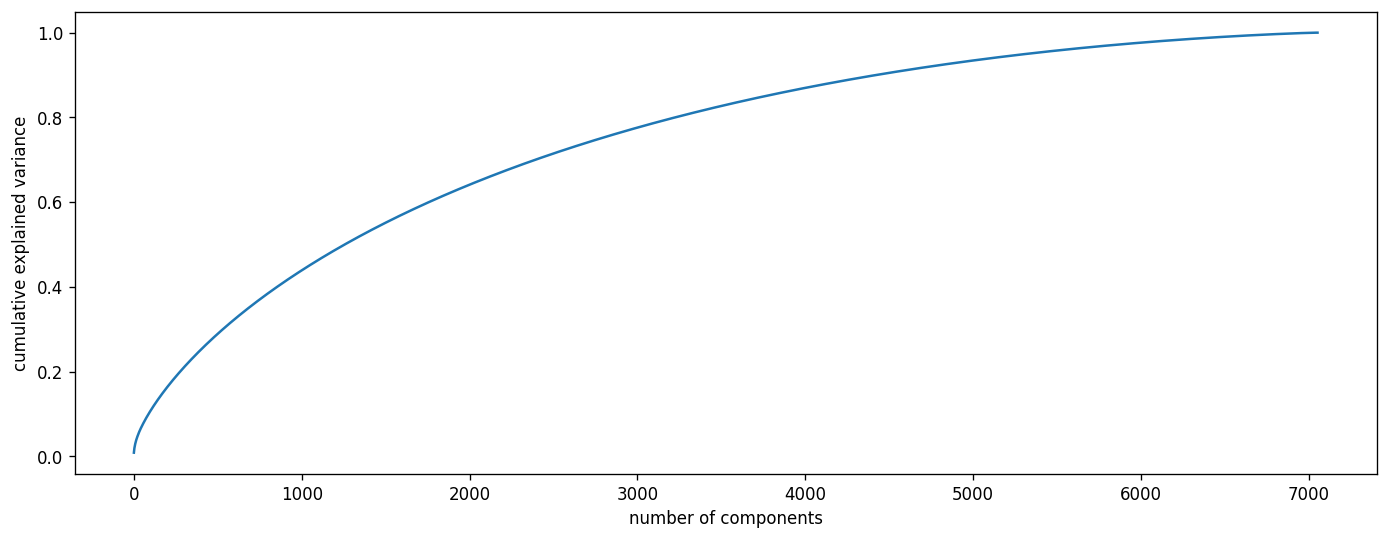

In [ ]:
# Lets plot explained var v/s comp to check how many components to be considered.
plt.figure(figsize=(14,5), dpi=120)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

We can see from the above plot almost 95% of the variance can be explained by 5000 components.

Since choosing 5000 could be tricky we will set the value to be 95% in sklearn. 

In [ ]:
pca_tuned = PCA(n_components=0.95)
pca_tuned.fit(X.toarray())
X_transformed = pca_tuned.transform(X.toarray())
X_transformed.shape

(7052, 5321)

## ***7. ML Model Implementation***

### ML Model - 1 Getting optimum K-value (Silhouette method)

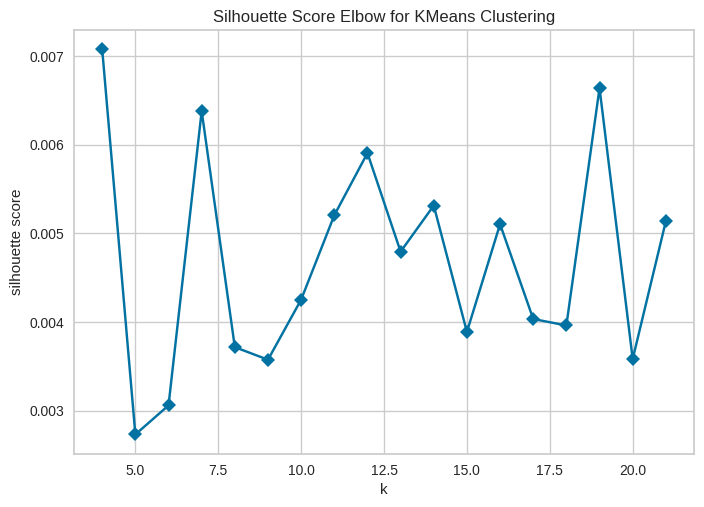

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
#plotting silhouette score for each number of cluster
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state = 5)

visualizer = KElbowVisualizer(model, k=(4,22), metric = 'silhouette', timings = False, locate_elbow = False)

visualizer.fit(X_transformed)
visualizer.show()

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score, silhouette_samples

In [ ]:
def silhouette_score_analysis(n):
  for n_ in range(2, n):
    km = KMeans(n_clusters = n_, random_state = 5)
    preds = km.fit_predict(X_transformed)

    centers = km.cluster_centers_

    score = silhouette_score(X_transformed, preds, metric = 'euclidean')
    print ("For n_clusters = {}, silhouette score is {}".format(n_, score))

    visualizer = SilhouetteVisualizer(km)

    visualizer.fit(X_transformed)
    visualizer.poof()


For n_clusters = 2, silhouette score is 0.00487619478809481


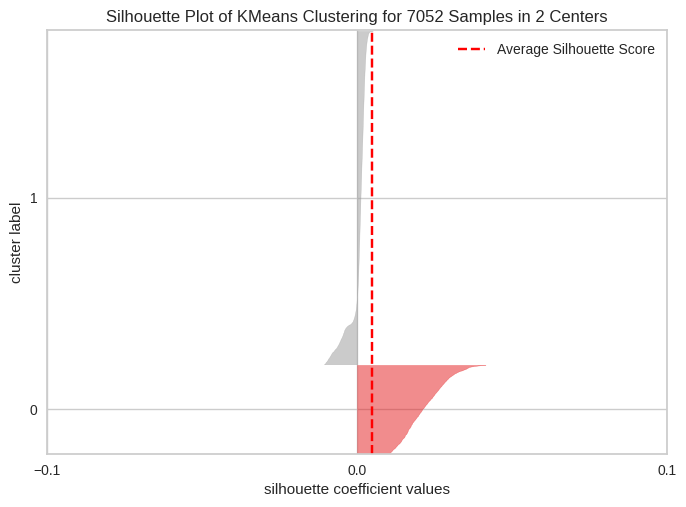

For n_clusters = 3, silhouette score is 0.006100788468648015


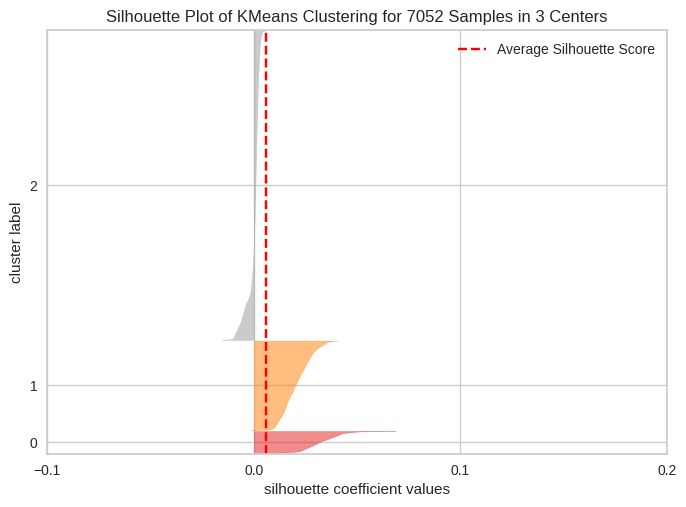

For n_clusters = 4, silhouette score is 0.007073125339776728


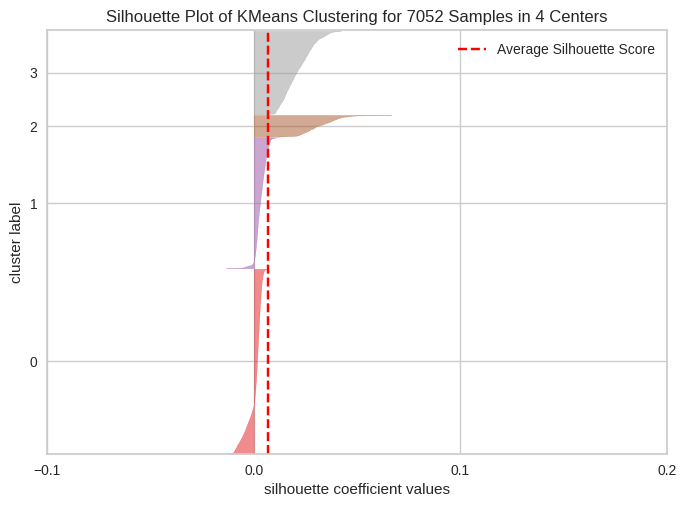

For n_clusters = 5, silhouette score is 0.0027315239583062196


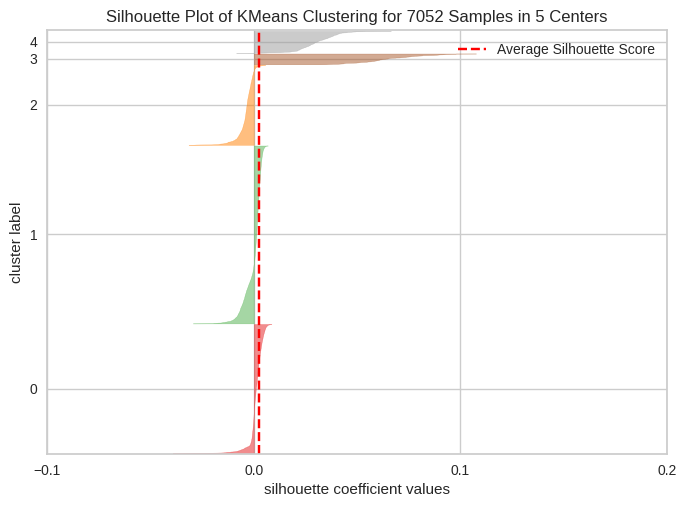

For n_clusters = 6, silhouette score is 0.003059232019496555


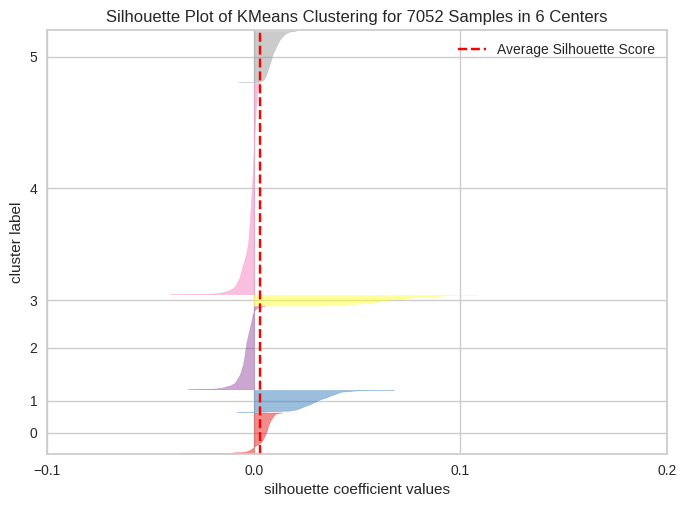

For n_clusters = 7, silhouette score is 0.006378255929841782


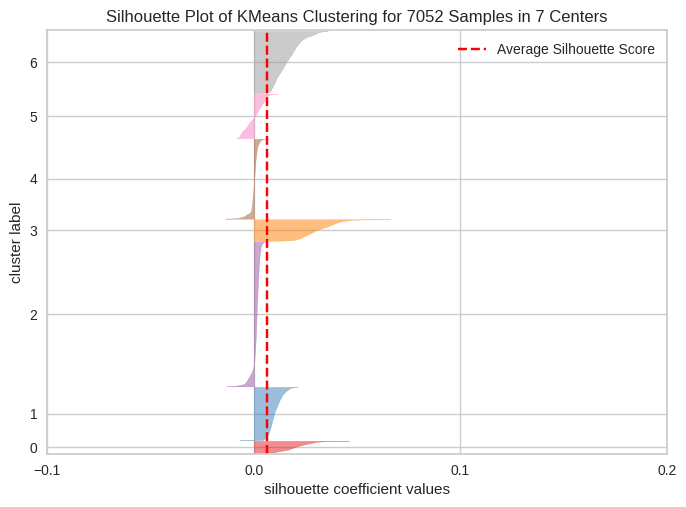

For n_clusters = 8, silhouette score is 0.0037162247421152397


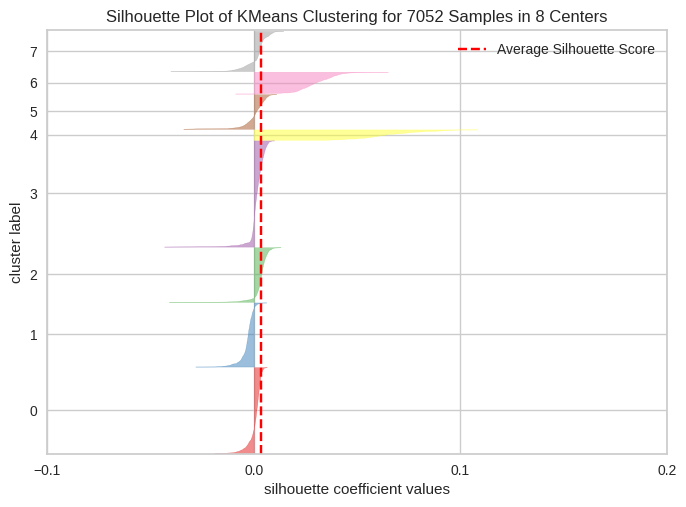

For n_clusters = 9, silhouette score is 0.003574356371186682


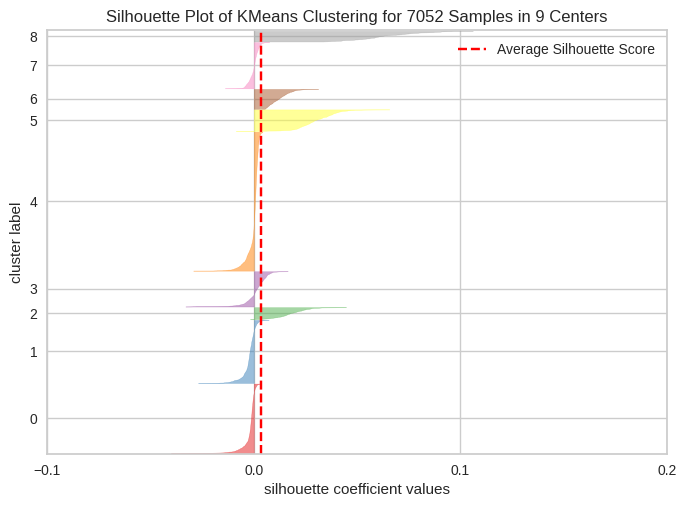

For n_clusters = 10, silhouette score is 0.004252146348036223


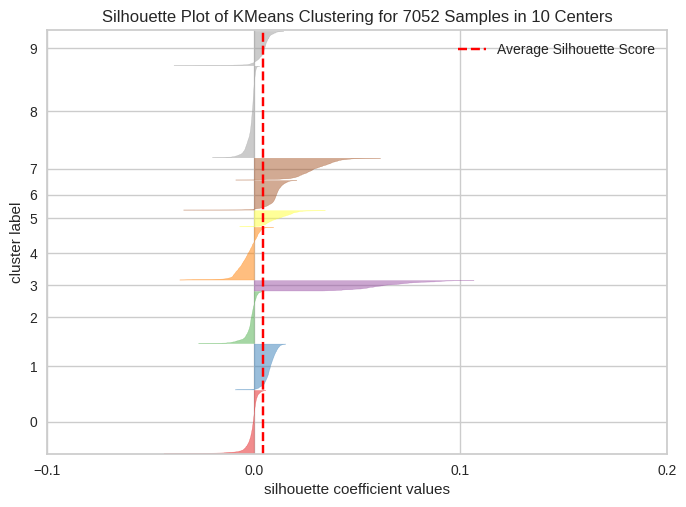

For n_clusters = 11, silhouette score is 0.005203484841577264


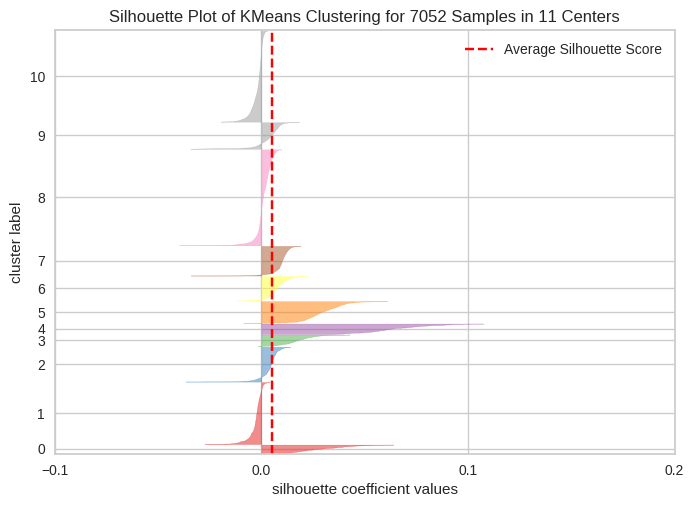

For n_clusters = 12, silhouette score is 0.005905215441892834


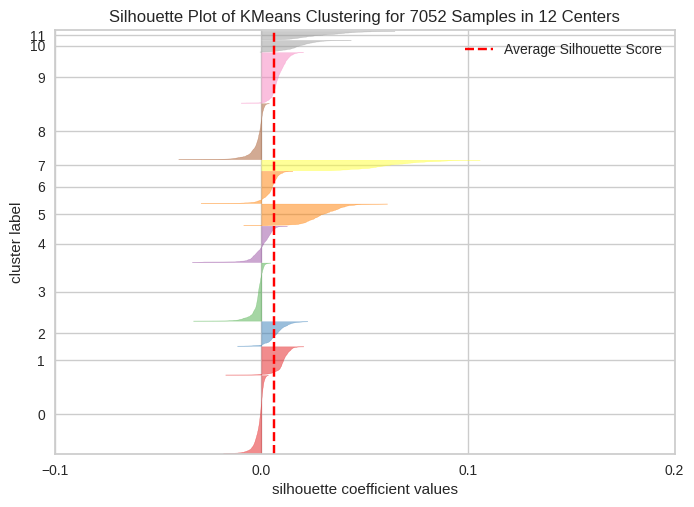

For n_clusters = 13, silhouette score is 0.004793057490350012


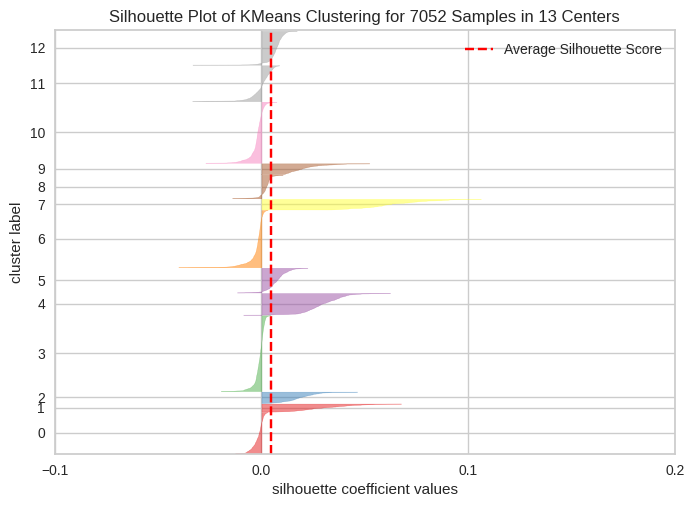

For n_clusters = 14, silhouette score is 0.0053131385321660545


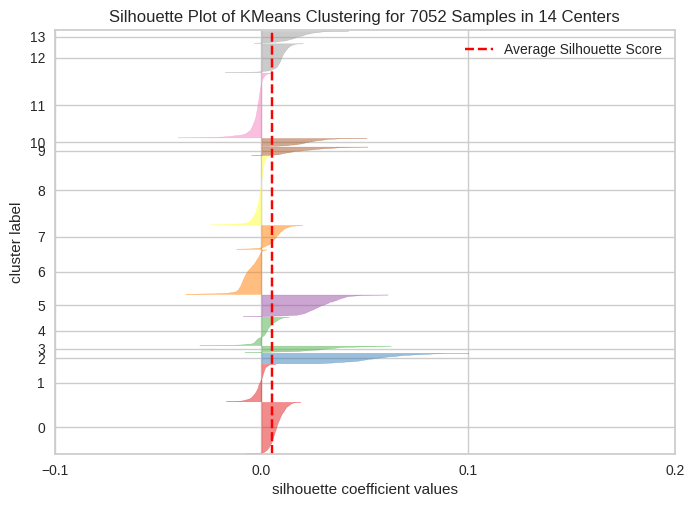

For n_clusters = 15, silhouette score is 0.0038879619045907293


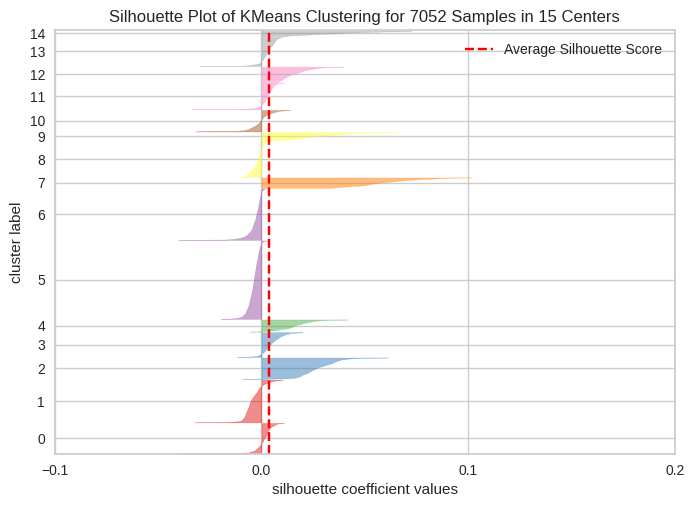

For n_clusters = 16, silhouette score is 0.005103127967598521


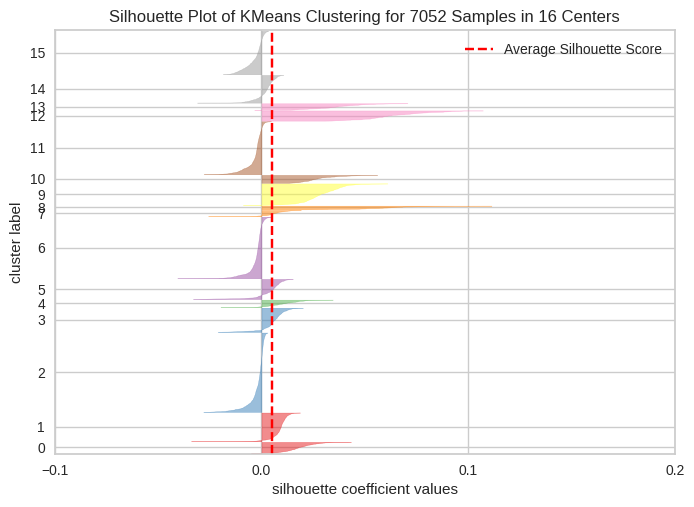

For n_clusters = 17, silhouette score is 0.004033731002107556


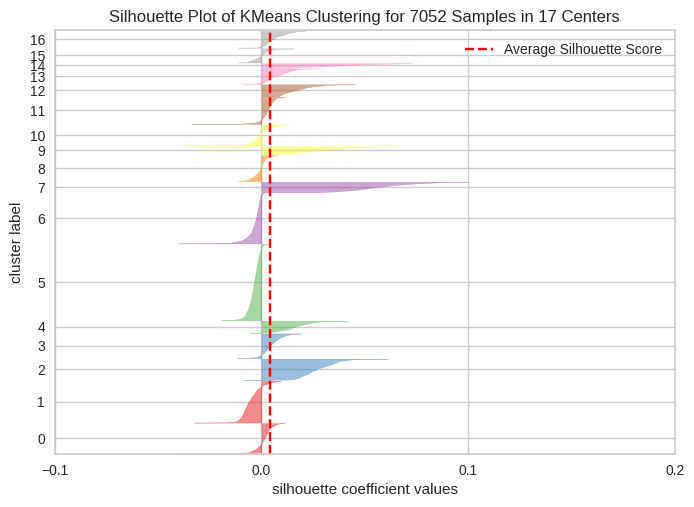

For n_clusters = 18, silhouette score is 0.003960717228240083


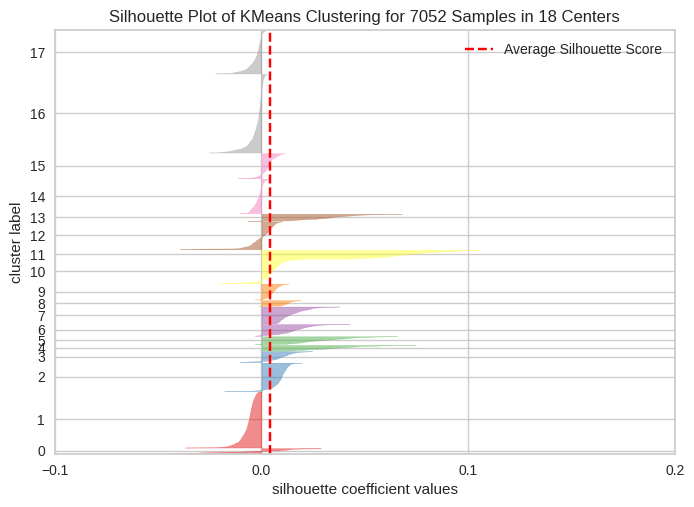

For n_clusters = 19, silhouette score is 0.006638754253468649


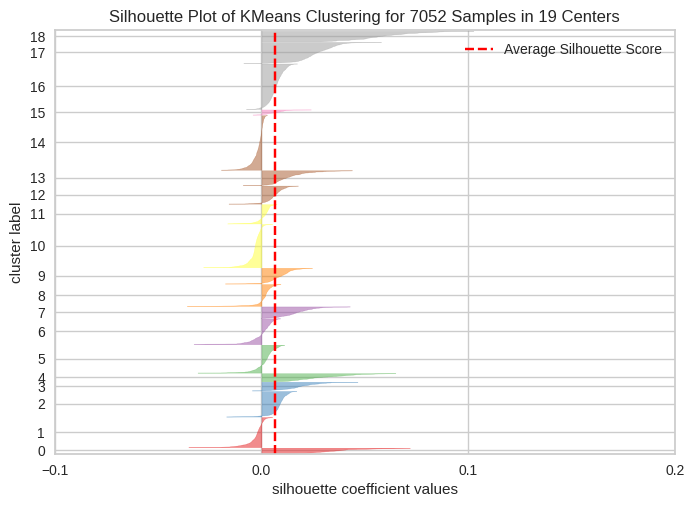

For n_clusters = 20, silhouette score is 0.0035821326593429635


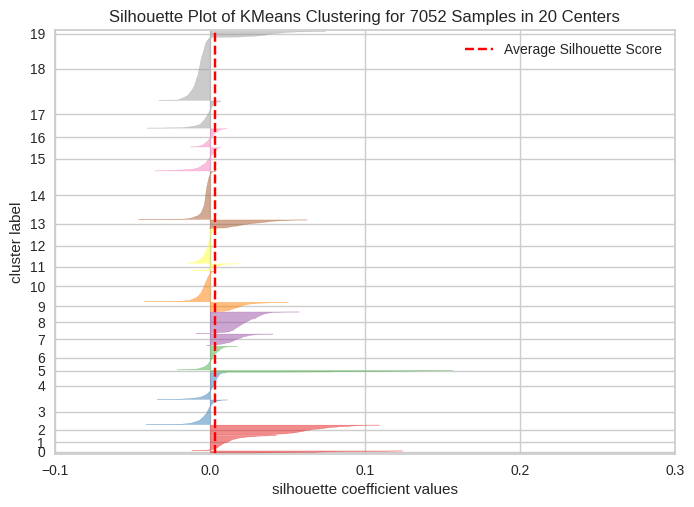

For n_clusters = 21, silhouette score is 0.005136403183289435


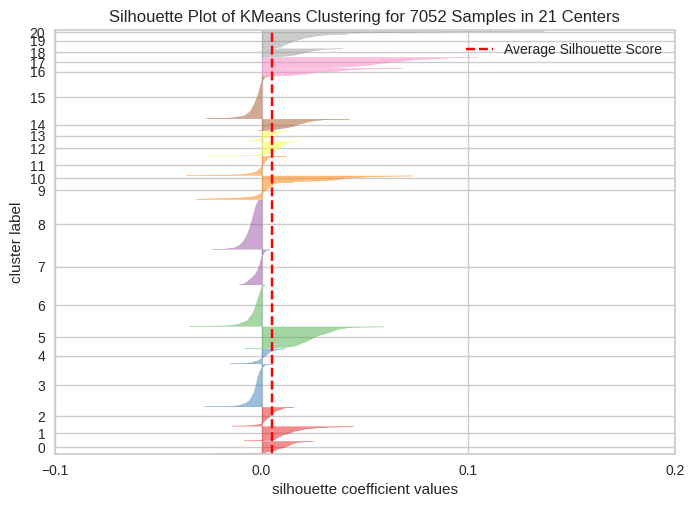

In [ ]:
silhouette_score_analysis(22)

### ML Model - 2 Getting optimum K-value (Elbow method)

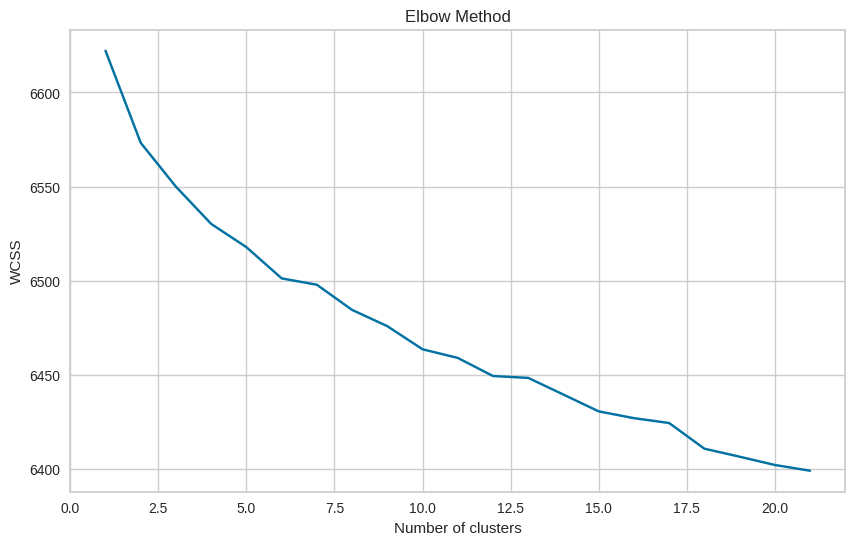

In [ ]:
#plotting graph for elbow method
plt.figure(figsize=(10,6))

wcss = []

for i in range(1, 22):
  km = KMeans(n_clusters=i, init ='k-means++', max_iter=300, n_init=10, random_state=0)
  km.fit(X_transformed)
  wcss.append(km.inertia_)

plt.plot(range(1, 22), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

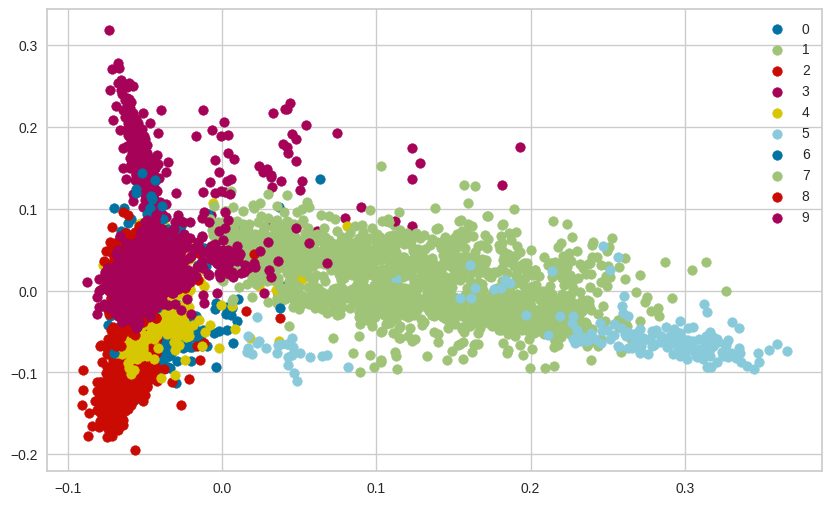

In [ ]:
#plotting cluster for 10 centroids
plt.figure(figsize=(10,6))
km= KMeans(n_clusters=10, init= 'k-means++', random_state=9)
km.fit(X_transformed)
label = km.fit_predict(X_transformed)
unique_labels = np.unique(label)

for i in unique_labels:
    plt.scatter(X_transformed[label == i , 0] , X_transformed[label == i , 1] , label = i)
plt.legend()
plt.show()

In [ ]:
df['cluster_number'] = km.labels_

In [ ]:
#word cloud imports
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
#word cloud for user rating review
def func_select_Category(category_name,column_of_choice):
  df_word_cloud = df[['cluster_number',column_of_choice]].dropna()
  df_word_cloud = df_word_cloud[df_word_cloud['cluster_number']==category_name]
  text = " ".join(word for word in df_word_cloud[column_of_choice])
  # Create stopword list:
  stopwords = set(STOPWORDS)
  # Generate a word cloud image
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  # Plot the wordclouds
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.title(f'Cluster: {i}')
  plt.axis("off")
  plt.show()

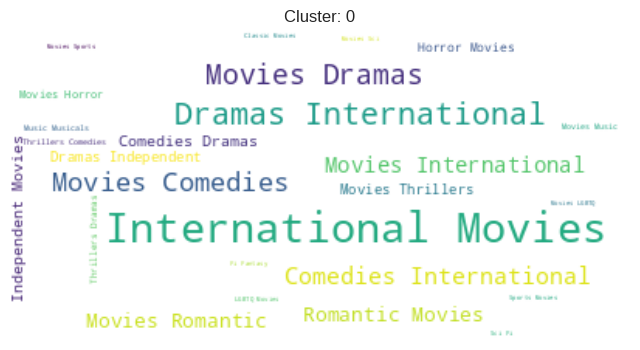

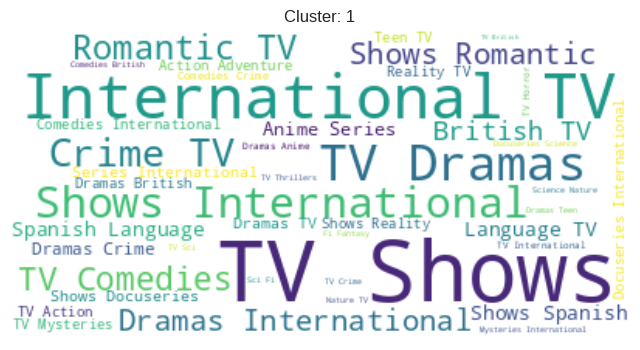

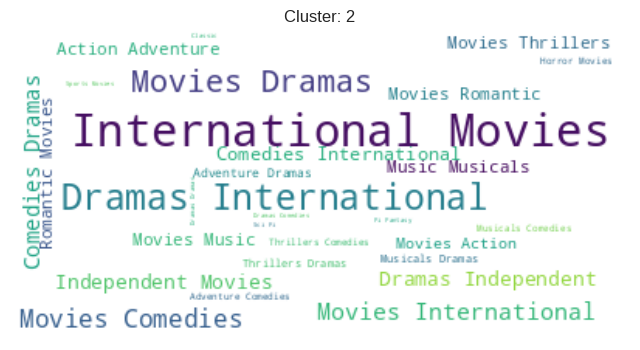

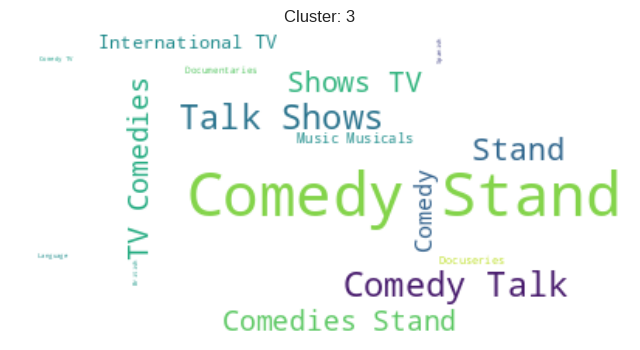

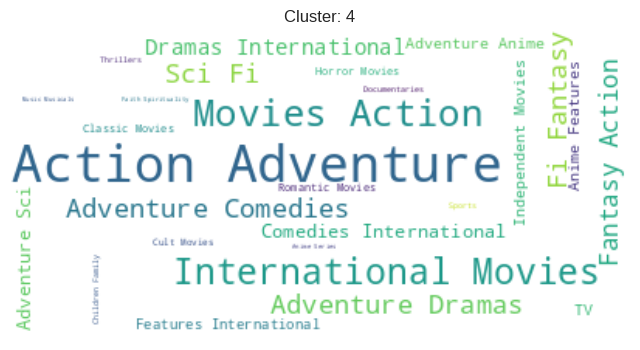

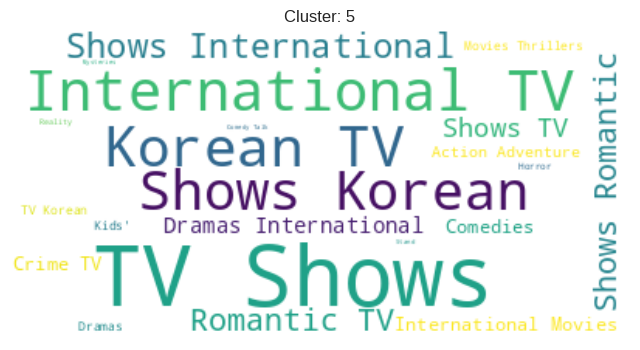

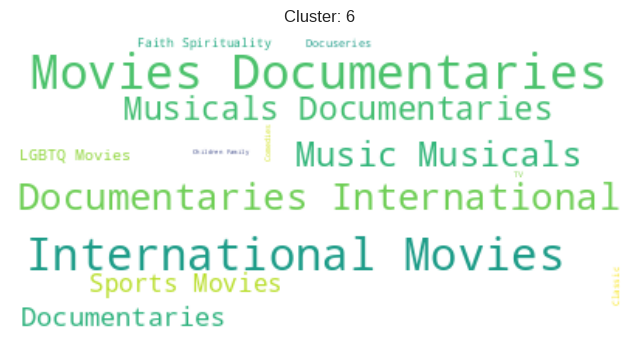

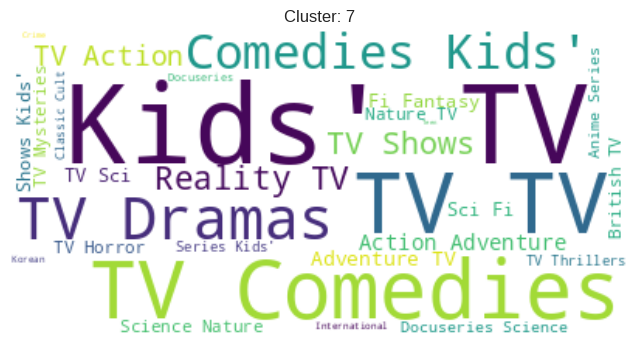

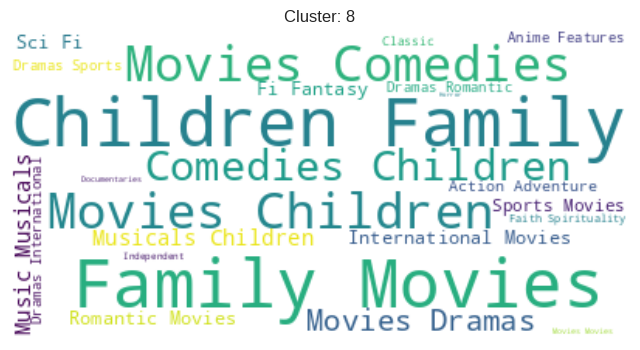

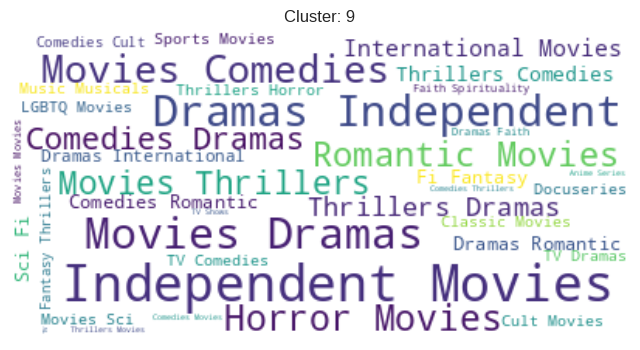

In [ ]:
for i in range(10):
  func_select_Category(i,'listed_in')

### Getting recommendation

In [ ]:
# Calculate cosine similarity between documents using TF-IDF representation
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
t_vectorizer = TfidfVectorizer()
count_matrix= t_vectorizer.fit_transform(bag_of_words)
cosine_sim = cosine_similarity(count_matrix, count_matrix)
cosine_sim

array([[1.        , 0.03027196, 0.02042725, ..., 0.00349765, 0.00210759,
        0.02159329],
       [0.03027196, 1.        , 0.00556673, ..., 0.00603992, 0.04004435,
        0.00204267],
       [0.02042725, 0.00556673, 1.        , ..., 0.00523437, 0.00706339,
        0.00198262],
       ...,
       [0.00349765, 0.00603992, 0.00523437, ..., 1.        , 0.04501707,
        0.00192071],
       [0.00210759, 0.04004435, 0.00706339, ..., 0.04501707, 1.        ,
        0.00259186],
       [0.02159329, 0.00204267, 0.00198262, ..., 0.00192071, 0.00259186,
        1.        ]])

In [ ]:
# Create a Pandas Series with the index values from the cluster_df DataFrame and display the first five elements
indices = pd.Series(cluster_df.index)
indices[:5]

0       3%
1     7:19
2    23:59
3        9
4       21
Name: title, dtype: object

In [ ]:
# function that takes in movie title as input and returns the top 10 recommended movies
def recommendations(Title, cosine_sim = cosine_sim):
    recommended_movies = []
    # gettin the index of the movie that matches the title
    idx = indices[indices == Title].index[0]
    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

    # getting the indexes of the 10 most similar movies
    top_10_indexes = list(score_series.iloc[1:11].index)
    
    # populating the list with the titles of the best 10 matching movies
    for i in top_10_indexes:
        recommended_movies.append(list(cluster_df.index)[i])    
    return recommended_movies

In [ ]:
# Lets try getting recommendations for Movies.
movie_recommendations = pd.DataFrame(recommendations('Bad Boys'), columns=['Recommendations'])
movie_recommendations.head(11)

Recommendations
0                      Bad Boys II
1                    Tortilla Soup
2                        GoldenEye
3                  Madam Secretary
4                           Dollar
5                         Clinical
6                     Act of Valor
7                         The Eddy
8  Martin Lawrence Live: Runteldat
9                        Slow West

In [ ]:
# Lets try getting recommendations for Tv-Shows.
tvshows_recommendations = pd.DataFrame(recommendations('13 Reasons Why'), columns=['Recommendations'])
tvshows_recommendations.head(11)

Recommendations
0  13 Reasons Why: Beyond the Reasons
1                           Mind Game
2                    Super Dark Times
3                        Molly's Game
4                           Frequency
5                          The Sinner
6                        Raising Dion
7                          Get Shorty
8  Diana: 7 Days That Shook the World
9                    La Reina del Sur

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

* Movies uploaded on Netflix are more than twice the TV Shows uploaded.
* TV shows and movies are incresing continuosly but in 2019 there is drop in number of movies.
* From Octomber to January, maximum number of movies and TV shows were added.
* Maximum number of movies and TV shows were either on start of the month or mid of the month.
* United State tops in the list of maximum number of movies and TV shows followed by India, UK and Japan.
* Maximum of the movies as well as TV shows are for matures only.
* Anupam Kher top from the list of casts having maximum number of movies and TV shows.
* Majority of movies have running time of between 50 to 150 min.
* Almost 68% of TV shows consist of single season only.
* Top 3 genres are exactly same for movies and TV shows.
* Dramas genres hit all over the world.
* 30% movies and 50% TV shows are Netflix Originals.
* Clustering done by K-Means Clustering, found optimal number of clusters equal to 25 with highest Silhoeutte Score.
* Recommender system using cosine similarirty performs well on data.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***